In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
mse = [0, 2.5, 5, 10, 20, 100, 200]

In [20]:
def cargar(archivo):
    file = open(archivo, "rb")
    clase = pickle.load(file)
    file.close()
    return clase

def sacar_promedio(datos, w, indices):
    if w == 1.5:
        results = datos.datos_w15
    elif w == 2:
        results = datos.datos_w2
    elif w == 4:
        results = datos.datos_w4
    else:
        results = datos.datos_wextra
    tiempos = [dato.tiempos for dato in results]
    nodos = [dato.nodos for dato in results]
    tiempos_filtrado = [tiempos[i] for i in indices]
    nodos_filtrado = [nodos[i] for i in indices]
    can_mse = len(nodos_filtrado[0])
    tiempos, nodos = [], []
    for i in range(0, can_mse):
        datos = []
        for problema in tiempos_filtrado:
            datos.append(problema[i])
        tiempos.append(np.mean(datos))
    for i in range(0, can_mse):
        datos = []
        for problema in nodos_filtrado:
            datos.append(problema[i])
        nodos.append(np.mean(datos))
    return tiempos, nodos

def sacar_promedio(datos, w, indices):
    if w == 1.5:
        results = datos.datos_w15
    elif w == 2:
        results = datos.datos_w2
    elif w == 4:
        results = datos.datos_w4
    else:
        results = datos.datos_wextra
    tiempos = [dato.tiempos for dato in results]
    nodos = [dato.nodos for dato in results]
    tiempos_filtrado = [tiempos[i] for i in indices]
    nodos_filtrado = [nodos[i] for i in indices]
    can_mse = len(nodos_filtrado[0])
    tiempos, nodos = [], []
    for i in range(0, can_mse):
        datos = []
        for problema in tiempos_filtrado:
            datos.append(problema[i])
        tiempos.append(np.mean(datos))
    for i in range(0, can_mse):
        datos = []
        for problema in nodos_filtrado:
            datos.append(problema[i])
        nodos.append(np.mean(datos))
    return tiempos, nodos

def filtrar_astar(datos, w, minimo):
    if w == 1.5:
        results = datos.datos_w15
    elif w == 2:
        results = datos.datos_w2
    elif w == 4:
        results = datos.datos_w4
    else:
        results = datos.datos_wextra
    nodos = [dato.nodos[0] for dato in results]
    indices = []
    for i in range(0, len(nodos)):
        can_nodos = nodos[i]
        if can_nodos >= minimo:
            indices.append(i)
    return indices

def filtrar_por_astar(datos, indices):
    filtrados = []
    for i in indices:
        filtrados.append(datos[i])
    return filtrados

In [30]:
def graficar_k_(astar, fs, pos, best, w, minimo, log=False):
    mse = [0, 2.5, 5, 10, 20, 100, 200]
    indices = filtrar_astar(astar, w, minimo)
    astar = sacar_promedio(astar, w, indices)
    # astar[0].append(astar[0][-1])
    # astar[1].append(astar[1][-1])
    fs = sacar_promedio(fs, w, indices)
    pos = sacar_promedio(pos, w, indices)
    best = sacar_promedio(best, w, indices)
    # gráfico tiempo vs mse
    fig,ax = plt.subplots(dpi=144, figsize = [10,4], ncols=2)
    fig.tight_layout(pad=3)
    ax[0].plot([1,2,3,4,5,6,7], astar[0], label="A*", c="purple")
    ax[0].plot([1,2,3,4,5,6,7], fs[0], label="FS", c="red")
    ax[0].plot([1,2,3,4,5,6,7], pos[0], label="FDS pos", c="blue")
    ax[0].plot([1,2,3,4,5,6,7], best[0], label="FDS best", c="green")
    ax[0].set_xticks([1,2,3,4,5,6,7], mse)
    # ax[0].legend(fontsize=8, loc="upper left")
    ax[0].legend(fontsize=8)
    ax[0].set_xlabel("Heuristic MSE", fontsize=10)
    ax[0].set_ylabel("Runtime (s)", fontsize=10)
    ax[0].set_title(f"Mean Time vs MSE - W: {w} - k: 4", fontsize=10)
    if log:
        plt.yscale("log")
    # gráfico expansiones vs mse
    fig.tight_layout(pad=3)
    ax[1].plot([1,2,3,4,5,6,7], astar[1], label="A*", c="purple")
    ax[1].plot([1,2,3,4,5,6,7], fs[1], label="FS", c="red")
    ax[1].plot([1,2,3,4,5,6,7], pos[1], label="FDS pos", c="blue")
    ax[1].plot([1,2,3,4,5,6,7], best[1], label="FDS best", c="green")
    ax[1].set_xticks([1,2,3,4,5,6,7], mse)
    # ax[0].legend(fontsize=8, loc="upper left")
    ax[1].legend(fontsize=8)
    ax[1].set_xlabel("Heuristic MSE", fontsize=10)
    ax[1].set_ylabel("Expansions", fontsize=10)
    ax[1].set_title(f"Mean Expansions vs MSE - W: {w} - k: 4", fontsize=10)
    if log:
        plt.yscale("log")

In [4]:
astar = cargar("datos//dato_MSE_CHICO_2023-08-27 22.33.24.589415_--can_prop=16--can_op=100--rango=5--max_add=2--min_ap=3--a_star.pickle")
fs_k4 = cargar("datos//dato_MSE_CHICO_2023-08-27 22.33.24.589415_--can_prop=16--can_op=100--rango=5--max_add=2--min_ap=3--fs--k=4.pickle")
pos_k4 = cargar("datos//dato_MSE_CHICO_2023-08-27 22.33.24.589415_--can_prop=16--can_op=100--rango=5--max_add=2--min_ap=3--fds_pos--k=4.pickle")
best_k4 = cargar("datos//dato_MSE_CHICO_2023-08-27 22.33.24.589415_--can_prop=16--can_op=100--rango=5--max_add=2--min_ap=3--fds_best--k=4.pickle")

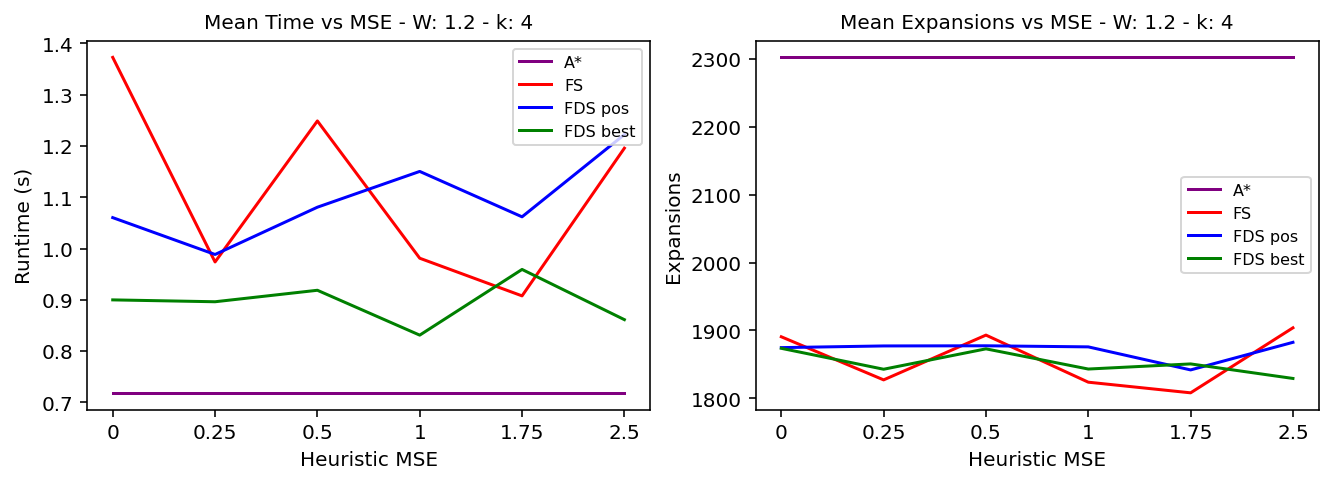

In [12]:
graficar_k_(astar, fs_k4, pos_k4, best_k4, 1.2, 0, log=False)

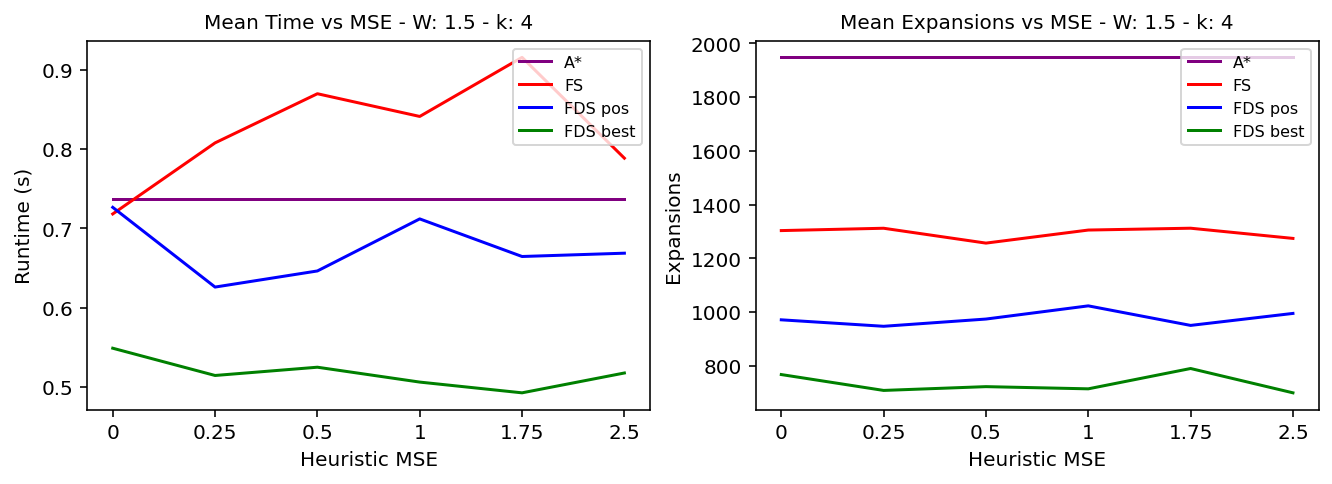

In [13]:
graficar_k_(astar, fs_k4, pos_k4, best_k4, 1.5, 0, log=False)

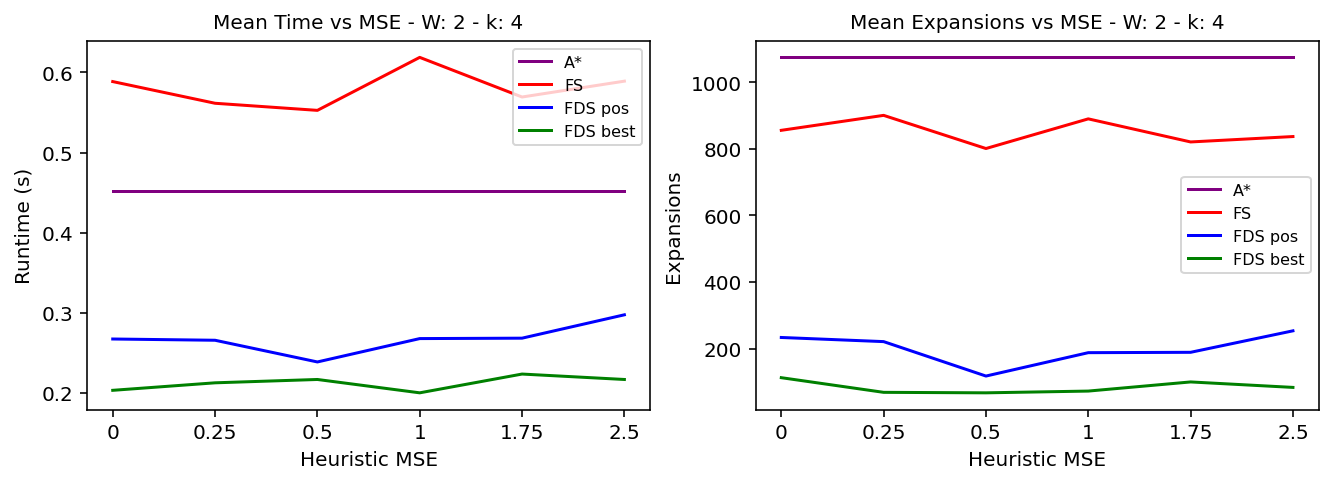

In [14]:
graficar_k_(astar, fs_k4, pos_k4, best_k4, 2, 0, log=False)

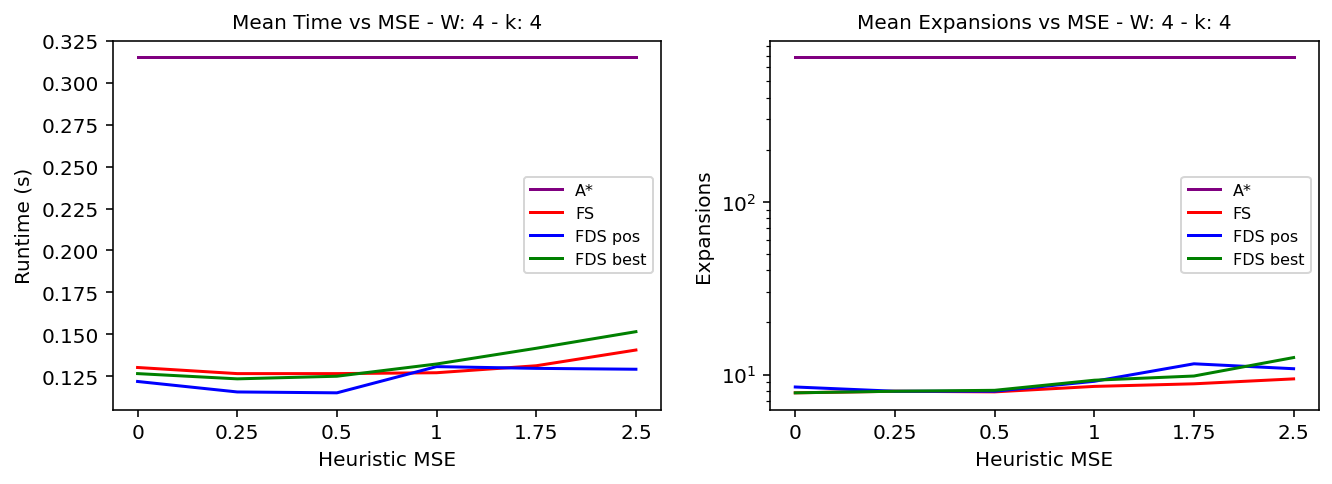

In [16]:
graficar_k_(astar, fs_k4, pos_k4, best_k4, 4, 0, True)

Text(0.5, 1.0, '% vs MSE')

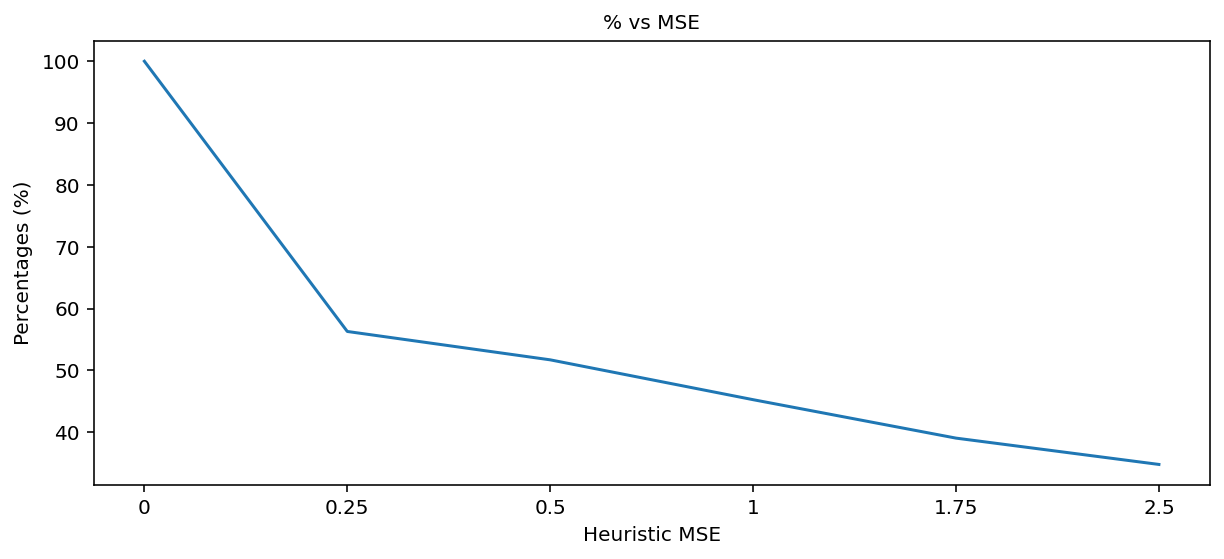

In [4]:
grafo = cargar("grafos//grafo_MSE_CHICO_2023-08-27 22.33.24.589415_--can_prop=16--can_op=100--rango=5--max_add=2--min_ap=3.pickle")
porcentajes = grafo.percentages_k4
fig,ax = plt.subplots(dpi=144, figsize = [10,4])
ax.plot([1,2,3,4,5,6], porcentajes)
ax.set_xticks([1,2,3,4,5,6], mse)
ax.set_xlabel("Heuristic MSE", fontsize=10)
ax.set_ylabel("Percentages (%)", fontsize=10)
ax.set_title(f"% vs MSE", fontsize=10)

In [14]:
astar6 = cargar("datos//dato_NUEVO_2023-08-27 22.33.24.589415_--can_prop=16--can_op=100--rango=5--max_add=2--min_ap=3--a_star - LMCUT.pickle")
fs6_k4 = cargar("datos//dato_NUEVO_2023-08-27 22.33.24.589415_--can_prop=16--can_op=100--rango=5--max_add=2--min_ap=3--fs--k=4 - LMCUT NUEVO.pickle")
pos6_k4 = cargar("datos//dato_NUEVO_2023-08-27 22.33.24.589415_--can_prop=16--can_op=100--rango=5--max_add=2--min_ap=3--fds_pos--k=4 - LMCUT.pickle")
best6_k4 = cargar("datos//dato_NUEVO_2023-08-27 22.33.24.589415_--can_prop=16--can_op=100--rango=5--max_add=2--min_ap=3--fds_best--k=4 - LMCUT.pickle")

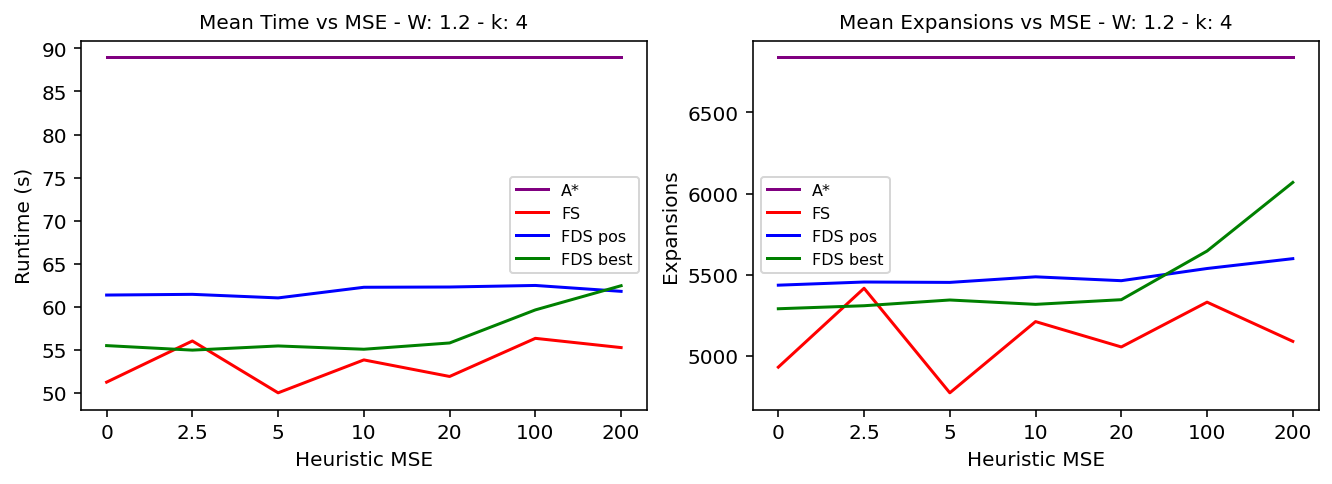

In [29]:
graficar_k_(astar6, fs6_k4, pos6_k4, best6_k4, 1.2, 0, False)